In [2]:
# relu (렐루) 함수를 살펴 보자
# 모델, 층, 핵심모듈
# layers ( 입력레이어, 히든레이어, 출력레이어 ) : 코어, 컨볼루션, 폴링, 반복
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model  # 순차모델 생성 : Sequential


핵심모듈 : 모델과 레이어를 생성하기 위한 기능

  - 활성화 모듈 : softmax, relu 등
  - Loss 모듈 : error모듈 손실 기능
  - Optimizer 모듈 : 최적화 기능을 수행 sgd 등
  - 정규화 : L1정규화, L2정규화

< relu 함수 >

20 텐서를 입력 받고 입력 텐서의 기능을 변환하는 3개의 텐서 연산을 한다

입력텐서 w 사이에 접곱(dot), 접곱의 결과인 20텐서와 벡터 b사이의 덧셈을 구한다

relu(x)는 max(x,0)

ouput = relu(dot(w.input)*b)
 - w : 2d tensor
 - b: vector

In [3]:
import numpy as np

def naive_relu(x):
    assert len(x.shape)==2
    x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] = max(x[i,j],0)
    return x

res = naive_relu(np.array([[1,2,3,4],[5,6,7,8]]))
print(res)

x=[1,2,3,4]
y=[4,5,6,7]
z = x + y  # 원소별 덧셈

z = np.maximum(z, 0.)  # 원소별 렐루 함수
print(z)

[[1 2 3 4]
 [5 6 7 8]]
[1. 2. 3. 4. 4. 5. 6. 7.]


In [4]:
tf.keras.layers.Dense(
    units, activation=None, use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None,
    bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
    bias_constraint=None, **kwargs
)
# 레이어 매개인자 : 입력데이터, 레이어 수(뉴런 수 / 단위), 초기값, 정규화, 제약, 활성화

NameError: name 'tf' is not defined

In [9]:
# exam1) 모든 입력 데이터에 0으로 설정해서 계층을 생성하자
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import *

my_init = initializers.Zeros()
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,), kernel_initializer=my_init))
model  # 순차모델 생성 : Sequential


In [14]:
# exam2) 모든 입력 데이터에 1으로 설정해서 계층을 생성하자
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import *

my_init = initializers.Ones()
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,), kernel_initializer=my_init))
model  # 순차모델 생성 : Sequential


In [12]:
# exam3) 입력 데이터의 정규 분포를 사용하여 값을 생성하자
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import *

my_init = initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,), kernel_initializer=my_init))
model  # 순차모델 생성 : Sequential


In [13]:
# exam4) 지정한 배율과 레이어의 입력모양, 출력모양을 기반으로 값을 생성
# fan_in = 입력장치, fan_out = 출력모양, fan_avg = 평균 입력 출력 장치 수
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import *

my_init = initializers.VarianceScaling(
    scale=1.0, mode='fan_in', distribution='truncated_normal',seed=None)
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,), kernel_initializer=my_init))
model  # 순차모델 생성 : Sequential


In [5]:
# exam05) kernel_constrain
# 최적화 단계에서 매개변수(가중치)에 대한 제약 조건이 설정된다. 레이어에 대한 제약조건 사용할때
# 가중치가 음수가 아닌것을 제안하자  / 표준으로 / 주어진 값이 작거나 같은 값으로 제안하자
from keras import constraints

my_const = constraints.UnitNorm(axis=0)

model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape=(784,), kernel_constraint=my_const))
model

tf.Tensor(3.0, shape=(), dtype=float32)
2.0


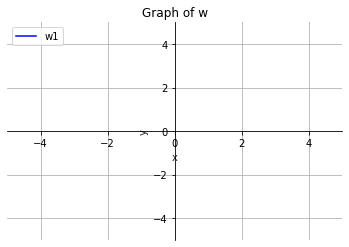

In [6]:
import tensorflow as tf
from matplotlib import pyplot as plt

tf.executing_eagerly()   # 계산 그래프를 즉시 실행. executing_eagerly 사용

x = tf.constant(3.0)
print(x)

with tf.GradientTape() as g:   # with 내부 계산을 기록
    g.watch(x)   # x를 기록
    y = 2 * x   # 미분 방정식
    
print(g.gradient(y, x).numpy())   # x = 3 일 때의 y 기울기를 구한다

fig = plt.figure()  # 그림그리는 바탕을 fig로 만들겠다.

ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.plot(x, y, '-b', label='w1')
plt.xlim(-5, 5)  # x 축의 눈금숫자의 시작과 마지막
plt.ylim(-5, 5)  # y 축의 눈금숫자의 시작과 마지막
plt.title('Graph of w')
plt.xlabel('x', color='#1C2833')  # x의 라벨 색깔
plt.ylabel('y', color='#1C2833')  # y의 라벨 색깔
plt.legend(loc='upper left')  # 레전드가 왼쪽에 나오게
plt.grid()  # 격자모양출력
plt.show()

In [7]:
x = np.linspace(-2,2,50)  # 직선의 시작점 끝점
y = -(x * w[1]/w[2]) + (w[0]/w[2])  # 최종 가중치 직선의 방정식

fig = plt.figure()  # 그림그리는 바탕을 fig로 만들겠다.

ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.plot(x, y, '-b', label='w1')
plt.xlim(-5, 5)  # x 축의 눈금숫자의 시작과 마지막
plt.ylim(-5, 5)  # y 축의 눈금숫자의 시작과 마지막
plt.title('Graph of w')
plt.xlabel('x', color='#1C2833')  # x의 라벨 색깔
plt.ylabel('y', color='#1C2833')  # y의 라벨 색깔
plt.legend(loc='upper left')  # 레전드가 왼쪽에 나오게
plt.grid()  # 격자모양출력
plt.show()

NameError: name 'w' is not defined

In [8]:
x = tf.Variable(3.0)

with tf.GradientTape() as g:
    y = x * x
    
g.gradient(y, x).numpy()

6.0

In [9]:
def with_if(x):
    if x <= 0:
        return x * 2   # 기울기가 2
    else:
        return x * x * x   # 3*x*x
    
def with_if_gradient(n):
    x = tf.Variable(n)
    with tf.GradientTape() as g:
        y = with_if(x)
    print('n = %.1f : gradient = %.1f' % (n, g.gradient(y, x)))
    
with_if_gradient(-3.0)
with_if_gradient(0.0)
with_if_gradient(3.0)

n = -3.0 : gradient = 2.0
n = 0.0 : gradient = 2.0
n = 3.0 : gradient = 27.0


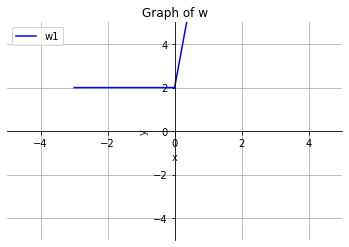

In [10]:

def Test(x,y):
    fig = plt.figure()  # 그림그리는 바탕을 fig로 만들겠다.

    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.plot(x, y, '-b', label='w1')
    plt.xlim(-5, 5)  # x 축의 눈금숫자의 시작과 마지막
    plt.ylim(-5, 5)  # y 축의 눈금숫자의 시작과 마지막
    plt.title('Graph of w')
    plt.xlabel('x', color='#1C2833')  # x의 라벨 색깔
    plt.ylabel('y', color='#1C2833')  # y의 라벨 색깔
    plt.legend(loc='upper left')  # 레전드가 왼쪽에 나오게
    plt.grid()  # 격자모양출력
    plt.show()
    
x = [-3.0, 0.0, 3.0]
y = [2.0, 2.0, 27.0]
Test(x,y)

In [11]:

a = tf.Variable(3.0)
b = tf.Variable(4.0)

with tf.GradientTape() as g:
    f = a ** 2 + 5 * b  # 다변량 미분 공식
    
g.gradient(f, [a,b])

[<tf.Tensor: shape=(), dtype=float32, numpy=6.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.0>]

In [12]:
a = tf.Variable(3.0)
b = tf.Variable(4.0)

with tf.GradientTape() as g:
    f = a ** 2 + 5 * b  # 다변량 미분 공식
    
g.gradient(f, [b, [a]])

[<tf.Tensor: shape=(), dtype=float32, numpy=5.0>,
 [<tf.Tensor: shape=(), dtype=float32, numpy=6.0>]]

In [13]:
# exam) 모델 생성
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.models import Sequential

model = Sequential()
# model.add(Dense(512, activation = 'relu', input_shape=(784,), kernel_initializer=my_init))
# model

input_layer = Dense(32, input_shape=(8,))
model.add(input_layer)

hidden_layer = Dense(64, activation='relu')
model.add(hidden_layer)

output_layer = Dense(8)
model.add(output_layer)

layers = model.layers
print(layers, '\n')

inputs = model.inputs  # 모델의 모든 입력텐서 반환
print(inputs, '\n')

output = model.outputs
print(output, '\n')

# model.get_weights() - 모든 가중치를 numpy 배열로 반환한다
# model.set_weights()

[<tensorflow.python.keras.layers.core.Dense object at 0x000001FCFFCDAD90>, <tensorflow.python.keras.layers.core.Dense object at 0x000001FC812F9040>, <tensorflow.python.keras.layers.core.Dense object at 0x000001FC821F6430>] 

[<KerasTensor: shape=(None, 8) dtype=float32 (created by layer 'dense_2_input')>] 

[<KerasTensor: shape=(None, 8) dtype=float32 (created by layer 'dense_4')>] 



In [14]:
model = Sequential()
input_layer = Dense(4, input_shape=(4,))
model.add(input_layer)
model.get_weights()

[array([[-0.3248762 , -0.14681351,  0.14212435, -0.23070532],
        [-0.03556889, -0.71416867, -0.5409446 , -0.01608658],
        [-0.7449971 ,  0.45187002, -0.85480875,  0.7351665 ],
        [-0.19342226,  0.7374545 , -0.6168867 , -0.23302674]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32)]

In [15]:
from keras.models import model_from_json

# 모델의 직렬화

config = model.get_config()
config

# 로드
json_string = model.to_json()
json_string

new_model = model_from_json(json_string)
new_model

# 모델값을 문자열로
res = model.to_yaml()
res

# 모델을 요약
model.summary()

# 모델 훈련 및 예측
# 컴파일(모델의 학습과정) -> fit(훈련데이터로 모델 훈련) -> 평가(테스트데이터로 모델평가) -> 예측(새로운 입력에 대한 결과를 예측)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 4)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 모델 생성 연습
from keras.layers import Input

data = Input(shape=(2,3))
layer = Dense(2)(data)
print(layer)

model = Model(inputs=data, outputs=layer)
model.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 2, 2), dtype=tf.float32, name=None), name='dense_7/BiasAdd:0', description="created by layer 'dense_7'")


TypeError: call() got an unexpected keyword argument 'outputs'

In [18]:
compile(
    optimizer='rmsprop', loss=None, metrics=None, loss_weights=None,
    weighted_metrics=None, run_eagerly=None, steps_per_execution=None, **kwargs
)

fit(
    x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None,
    validation_split=0.0, validation_data=None, shuffle=True, class_weight=None,
    sample_weight=None, initial_epoch=0, steps_per_epoch=None,
    validation_steps=None, validation_batch_size=None, validation_freq=1,
    max_queue_size=10, workers=1, use_multiprocessing=False
)

NameError: name 'kwargs' is not defined

In [19]:
from tensorboardX import SummaryWriter
from datetime import datetime
from packaging import version

summary = SummaryWriter()
logdir="logs\\fit\\" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

NameError: name 'keras' is not defined

Epoch 1/5
4/4 [==============================] - 9s 1s/step - loss: 11.4418 - accuracy: 0.0754 - val_loss: 11.4374 - val_accuracy: 0.0875
Epoch 2/5
4/4 [==============================] - 0s 27ms/step - loss: 11.4201 - accuracy: 0.0750 - val_loss: 11.4359 - val_accuracy: 0.0775
Epoch 3/5
4/4 [==============================] - 0s 28ms/step - loss: 11.4407 - accuracy: 0.0924 - val_loss: 11.4349 - val_accuracy: 0.0800
Epoch 4/5
4/4 [==============================] - 0s 27ms/step - loss: 11.4810 - accuracy: 0.1093 - val_loss: 11.4346 - val_accuracy: 0.0825
Epoch 5/5
4/4 [==============================] - 0s 27ms/step - loss: 11.3828 - accuracy: 0.0867 - val_loss: 11.4352 - val_accuracy: 0.0825
<class 'tensorflow.python.keras.callbacks.History'>
[11.419689178466797, 11.417720794677734, 11.41739273071289, 11.417126655578613, 11.417886734008789]
[0.08500000089406967, 0.07750000059604645, 0.0949999988079071, 0.09749999642372131, 0.0925000011920929]
[11.437448501586914, 11.435863494873047, 11.43

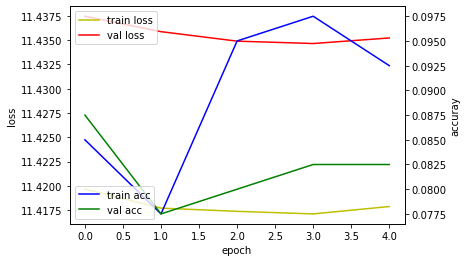

In [20]:
# 간단한 모델 컴파일 해보자
import numpy as np
import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorboardX import SummaryWriter
from datetime import datetime
from packaging import version

summary = SummaryWriter()
logdir="logs\\fit\\" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# 임의의 데이터
x_train = np.random.random((100,4,8))
y_train = np.random.random((100,4,10))

# 임의의 유효성 검사 데이터
x_val = np.random.random((100,4,8))
y_val = np.random.random((100,4,10))

# 순차 모델링
model = Sequential()

# 모델 추가, 레이어 추가
model.add(LSTM(16, return_sequences=True))
model.add(Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 데이터 훈련
hist = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_val,y_val), callbacks=[tensorboard_callback])
hist
print(type(hist))
print(hist.history['loss'])
print(hist.history['accuracy'])
print(hist.history['val_loss'])
print(hist.history['val_accuracy'])

# fit() 히스토리 기능
'''
loss : 훈련 손실값
accuracy : 정확도
val_loss : 검증 손실값
val_accuracy : 검증 정확도
'''

# C:\Users\USER>tensorboard --logdir C:\Users\USER\MyPython\DL\logs

# 그래프로 확인

import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

Epoch 1/5
4/4 [==============================] - 3s 217ms/step - loss: 11.6564 - accuracy: 0.0959 - val_loss: 11.6532 - val_accuracy: 0.1000
Epoch 2/5
4/4 [==============================] - 0s 16ms/step - loss: 11.6588 - accuracy: 0.1069 - val_loss: 11.6525 - val_accuracy: 0.1000
Epoch 3/5
4/4 [==============================] - 0s 16ms/step - loss: 11.6727 - accuracy: 0.1019 - val_loss: 11.6529 - val_accuracy: 0.1000
Epoch 4/5
4/4 [==============================] - 0s 14ms/step - loss: 11.6501 - accuracy: 0.0874 - val_loss: 11.6532 - val_accuracy: 0.1000
Epoch 5/5
4/4 [==============================] - 0s 15ms/step - loss: 11.7387 - accuracy: 0.0861 - val_loss: 11.6536 - val_accuracy: 0.1000


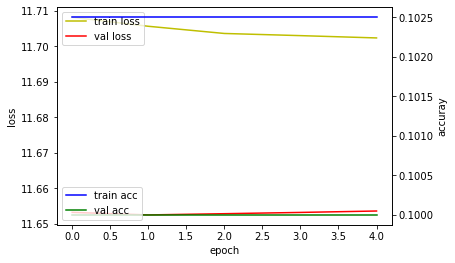

In [16]:
# 간단한 모델 컴파일 해보자.  
import numpy as np 
from keras.layers import Input
from keras.models import * 
from keras.layers import Dense, Activation, Dropout, LSTM
#임의의 데이터  
x_train = np.random.random((100,4,8)) 
y_train = np.random.random((100,4,10))
# 임의의 유효성 검사 데이터  
x_val = np.random.random((100,4,8)) 
y_val = np.random.random((100,4,10))
# 순차 모델링
model =Sequential()
# 모델 추가, 레이어 추가  
model.add(LSTM(16, return_sequences = True)) 
model.add(Dense(10, activation = 'softmax'))
# 모델 컴파일  
model.compile(  loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
#데이터 훈련 
hist =model.fit(x_train, y_train, batch_size = 32, epochs = 5, validation_data = (x_val, y_val))
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

 One Hot Encoding
- 사람이 인식할 수 있는 데이터를 숫자로 변환정렬시켜서 컴퓨터에게 주입시킨다.

Data -> 숫자
단어 -> 숫자
딥러닝 : 문자열 -> 분철 -> 숫자 인덱싱 -> 원핫인코딩


In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

# 같은 글자는 인덱스로 분류 ex.너무
str = '주아는 너무 졸리다. 지금 당장이라도 너무 자고 싶다.'
tokenizer = Tokenizer()
tokenizer.fit_on_texts([str])
print(tokenizer.word_index)


{'너무': 1, '주아는': 2, '졸리다': 3, '지금': 4, '당장이라도': 5, '자고': 6, '싶다': 7}


In [25]:
encode = tokenizer.texts_to_sequences([str])[0]
print(encode)  # 같은 글자는 같은 인덱스 번호가 나옴

[2, 1, 3, 4, 5, 1, 6, 7]


In [26]:
onehot = tf.keras.utils.to_categorical(encode)
print(onehot)

[[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [28]:
onehot = tf.keras.utils.to_categorical(encode,20)  # 20개로 늘리기
print(onehot)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [64]:
# exam) 모델링 학습해보자
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from keras import backend as K
from sklearn.utils import shuffle
import tensorflow as tf

# 1. 데이터 로드
test = pd.read_csv('titanic_test.csv')
train = pd.read_csv('titanic_train.csv')

train_x = train.drop('Survived', axis=1)
train_y = train['Survived']
test_x = test

# 결측값 삭제
train_x = train_x.drop(['Name','Ticket','Cabin'],axis=1)
test_x = test_x.drop(['Name','Ticket','Cabin'],axis=1)

# 결측값 채우기
train_age_median = train_x['Age'].median()  # 중간값
train_x['Age'] = train_x['Age'].fillna(train_age_median)
train_x['Embarked'] = train_x['Embarked'].fillna('S')

# test 결측값 채우기
test_age_median = test_x['Age'].median()  # 중간값
test_x['Age'] = test_x['Age'].fillna(test_age_median)

test_x['Fare'] = test_x['Fare'].fillna(test_x['Fare'].describe()[5])

# 더미 컬럼 생성
train_x_dummy = pd.get_dummies(train_x, columns=['Sex','Embarked'])
test_x_dummy = pd.get_dummies(test_x, columns=['Sex','Embarked'])

# one-hot
train_y_onehot = np_utils.to_categorical(train_y)
train_x_dummy_arr = train_x_dummy.values.astype('float32')

train_x_dummy_arr

array([[  1.,   3.,  22., ...,   0.,   0.,   1.],
       [  2.,   1.,  38., ...,   1.,   0.,   0.],
       [  3.,   3.,  26., ...,   0.,   0.,   1.],
       ...,
       [889.,   3.,  28., ...,   0.,   0.,   1.],
       [890.,   1.,  26., ...,   1.,   0.,   0.],
       [891.,   3.,  32., ...,   0.,   1.,   0.]], dtype=float32)

In [78]:
# 2. 모델 생성
model = tf.keras.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

# 3. 컴파일
# model.compile(optimizer='rmsprop', loss='categotical_croosentropy', metrics=['accuracy'])
model.compile(optimizer='sgd', loss='mse', metrics=[tf.keras.metrics.Recall()])

# 4. fit()
mycall = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2, verbose=1, mode='auto')
model.fit(train_x_dummy_arr, train_y_onehot, epochs=10, batch_size=32, callbacks=[mycall])

# 5. 저장
model.save('res.h5')

Epoch 1/10
28/28 [==============================] - 1s 2ms/step - loss: 0.6276 - recall_7: 0.3714
Epoch 2/10
28/28 [==============================] - 0s 2ms/step - loss: 0.6222 - recall_7: 0.3767
Epoch 3/10
28/28 [==============================] - 0s 2ms/step - loss: 0.6090 - recall_7: 0.3884
Epoch 4/10
28/28 [==============================] - 0s 2ms/step - loss: 0.6210 - recall_7: 0.3765
Epoch 5/10
28/28 [==============================] - 0s 2ms/step - loss: 0.6409 - recall_7: 0.3588
Epoch 6/10
28/28 [==============================] - 0s 2ms/step - loss: 0.6132 - recall_7: 0.3858
Epoch 7/10
28/28 [==============================] - 0s 2ms/step - loss: 0.6063 - recall_7: 0.3901
Epoch 8/10
28/28 [==============================] - 0s 2ms/step - loss: 0.6100 - recall_7: 0.3890
Epoch 9/10
28/28 [==============================] - 0s 2ms/step - loss: 0.6172 - recall_7: 0.3810
Epoch 10/10
28/28 [==============================] - 0s 2ms/step - loss: 0.6102 - recall_7: 0.3883
